In [55]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets

In [56]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['sepal length' , 'sepal_width' , 'petal_length' , 'petal_width']
print(x)
y = pd.DataFrame(iris.target)
y.columns = ['targets']
print(y)

     sepal length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [57]:
Kmeans = KMeans(n_clusters = 3)
clusters = Kmeans.fit_predict(x)
from scipy.stats import mode
labels = np.zeros_like(clusters)
print(labels)
for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
acc = accuracy_score(iris.target, labels)
print('accuracy Score using Kmeans' , acc);



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
accuracy Score using Kmeans 0.8933333333333333


In [58]:
plt.figure(figsize = (10 , 10))
colormap = np.array(['red' , 'yellow', 'cyan'])


<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'petal_width')

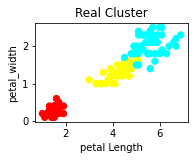

In [59]:
plt.subplot(2 , 2, 1)
plt.scatter(x.petal_length , x.petal_width ,c = colormap[y.targets] , s= 40)
plt.title('Real Cluster')
plt.xlabel("petal Length")
plt.ylabel('petal_width')


Text(0, 0.5, 'petal_width')

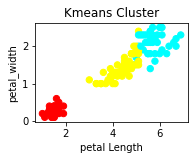

In [60]:
#Build the kmeans model
plt.subplot(2 , 2, 2)
plt.scatter(x.petal_length , x.petal_width ,c = colormap[labels] , s= 40)
plt.title('Kmeans Cluster')
plt.xlabel("petal Length")
plt.ylabel('petal_width')

In [61]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(x)
scaled_x = scalar.transform(x)
xs = pd.DataFrame(scaled_x , columns = x.columns)

In [62]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm_y = gmm.fit_predict(xs)
labels = np.zeros_like(clusters)

In [63]:
for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
acc  = accuracy_score(iris.target , labels)
print("accuracy score using GMM",acc)

accuracy score using GMM 0.9666666666666667


Text(0, 0.5, 'petal_width')

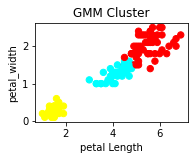

In [64]:
plt.subplot(2 , 2, 3)
plt.scatter(x.petal_length , x.petal_width ,c = colormap[gmm_y] , s= 40)
plt.title('GMM Cluster')
plt.xlabel('petal Length')
plt.ylabel('petal_width')